In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
%load_ext autoreload
autoreload=2
%matplotlib inline

In [3]:
#install requirements on google colab 
!pip install tensorflow matplotlib scikit-learn

In [4]:
import tensorflow

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [6]:
# Load data MNIST http://yann.lecun.com/exdb/mnist/

from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [7]:
print('Training dataset')
print(f'{str(X_train.shape[0])} training images of shape {str(X_train.shape[1])} x {str(X_train.shape[2])}')
print(f'{str(y_train.shape[0])} labels')
print('\nTest dataset')
print(f'{str(X_test.shape[0])} test images of shape {str(X_test.shape[1])} x {str(X_test.shape[2])}')
print(f'{str(y_test.shape[0])} labels')

Training dataset
60000 training images of shape 28 x 28
60000 labels

Test dataset
10000 test images of shape 28 x 28
10000 labels


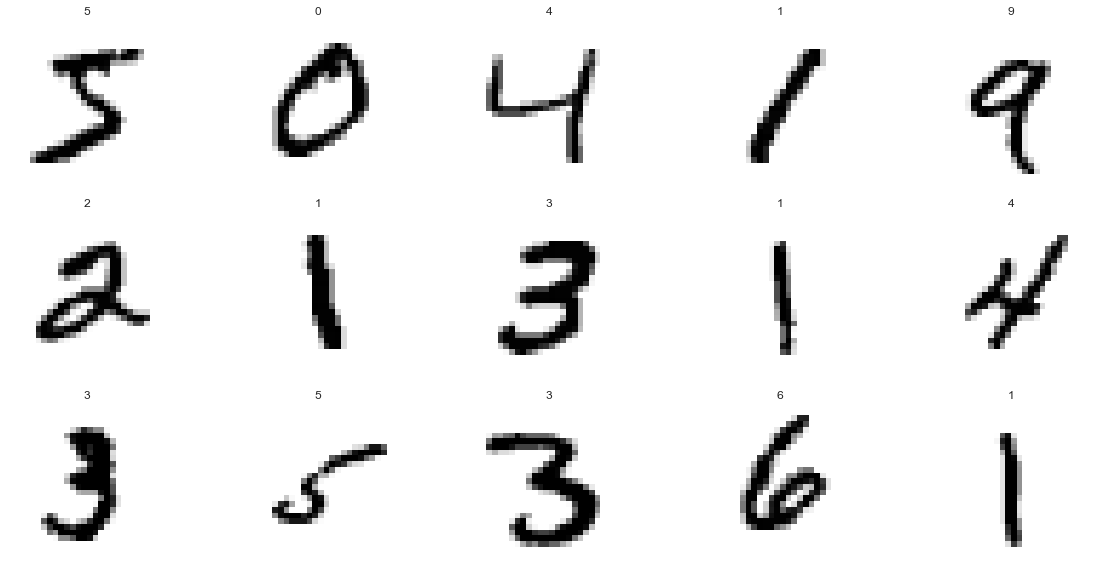

In [8]:
plt.figure(figsize=(20,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_train[i],cmap='gray_r')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [9]:
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf = RandomForestClassifier(n_estimators=80)

In [11]:
# Flatten the data
X_train = X_train/255.
X_test = X_test/255.
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [12]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80)

In [13]:
clf.score(X_test,y_test)

0.9689

In [14]:
y_pred = clf.predict(X_test)

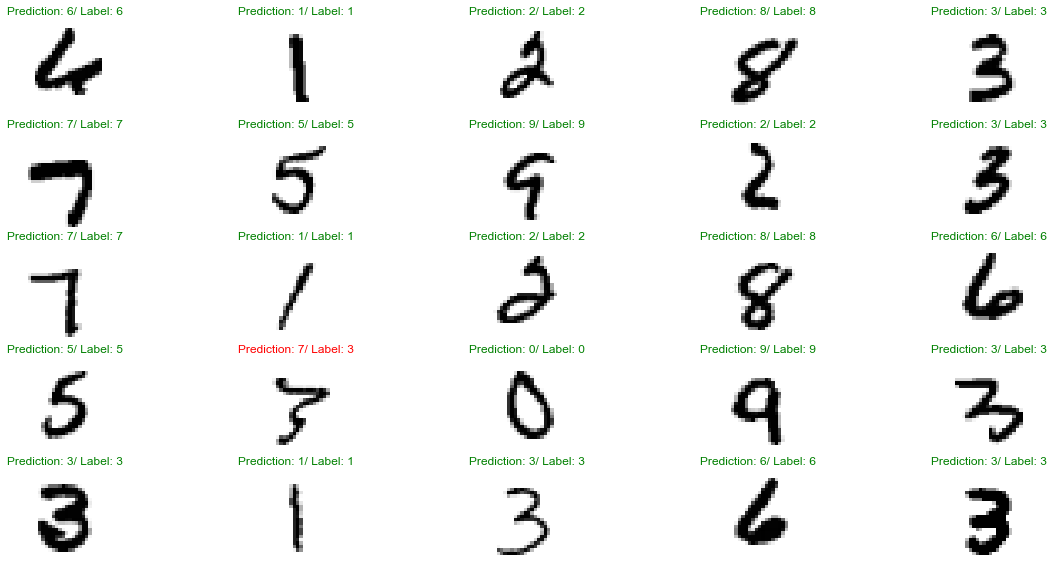

In [15]:
# Inspect 25 random prediction 
randomidx = random.sample(range(0, y_pred.shape[0]), 25)
plt.figure(figsize=(20,10))
for i,idx in enumerate(randomidx):
    plt.subplot(5,5,i+1)
    digit = X_test[idx].reshape(28,28)
    plt.imshow(digit,cmap='gray_r')
    if y_pred[idx]==y_test[idx]:
        plt.title(f'Prediction: {y_pred[idx]}/ Label: {y_test[idx]}',color="green")
    else:
        plt.title(f'Prediction: {y_pred[idx]}/ Label: {y_test[idx]}',color="red")
    plt.axis('off')


In [16]:
y_pred_proba = clf.predict_proba(X_test)

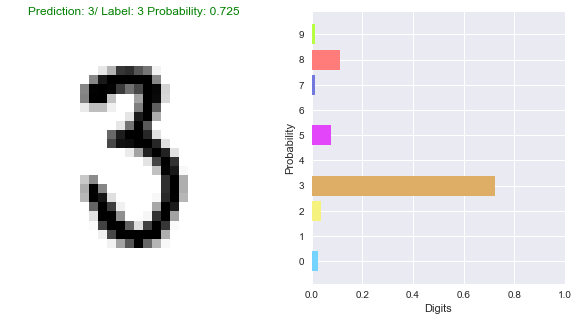

In [17]:
# Inspect a random prediction with probabilities

idx = random.randint(0,y_test.shape[0])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(X_test[idx].reshape(28,28),cmap='gray_r',interpolation='antialiased')
if y_pred[idx]==y_test[idx]:
    plt.title(f'Prediction: {y_pred[idx]}/ Label: {y_test[idx]} Probability: {y_pred_proba[idx][y_pred[idx]]}',color="green")
else:
    plt.title(f'Prediction: {y_pred[idx]}/ Label: {y_test[idx]} Probability: {y_pred_proba[idx][y_pred[idx]]}',color="red")
plt.axis('off')


plt.subplot(1,2,2)
digits= ['0','1','2','3','4','5','6','7','8','9']
colors=["#75D4FF","#66DE82","#F5F37D","#DEAD66","#FA4B45","#E346FA","#DE9666","#7378DE","#FF7C7A","#B6FF42"]
plt.barh(digits,y_pred_proba[idx],color=colors)
plt.xlim(0,1)
plt.xlabel('Digits')
plt.ylabel('Probability')

plt.show()

In [18]:
# Test on your own data 
your_image = 'four.png'

In [19]:
import PIL
test = PIL.Image.open(your_image).convert('L')
test = test.resize((28,28))
test = np.array(test)
test = test/255.
test = test.flatten()

In [20]:
test_pred_proba = clf.predict_proba([test])

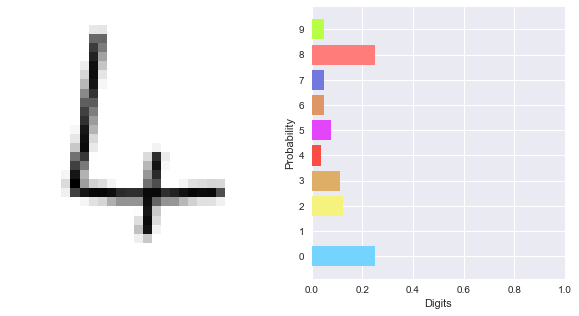

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(test.reshape(28,28),cmap='gray',interpolation='antialiased')
plt.axis('off')
plt.subplot(1,2,2)
digits= ['0','1','2','3','4','5','6','7','8','9']
colors=["#75D4FF","#66DE82","#F5F37D","#DEAD66","#FA4B45","#E346FA","#DE9666","#7378DE","#FF7C7A","#B6FF42"]
plt.barh(digits,test_pred_proba[0],color=colors)
plt.xlim(0,1)
plt.xlabel('Digits')
plt.ylabel('Probability')
plt.show()